In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [44]:
df=pd.read_csv('E:\\working_DATA\\titanic.csv',usecols=['Survived','Fare','Age'])

In [45]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


# Handling missing Values

In [46]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [47]:
age_mean=df['Age'].mean()

In [48]:
df['Age']=df['Age'].fillna(age_mean)

In [49]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

# Data Spliting

In [50]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [51]:
X

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [52]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# train test split

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Checking Distribution using QQ plot

C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


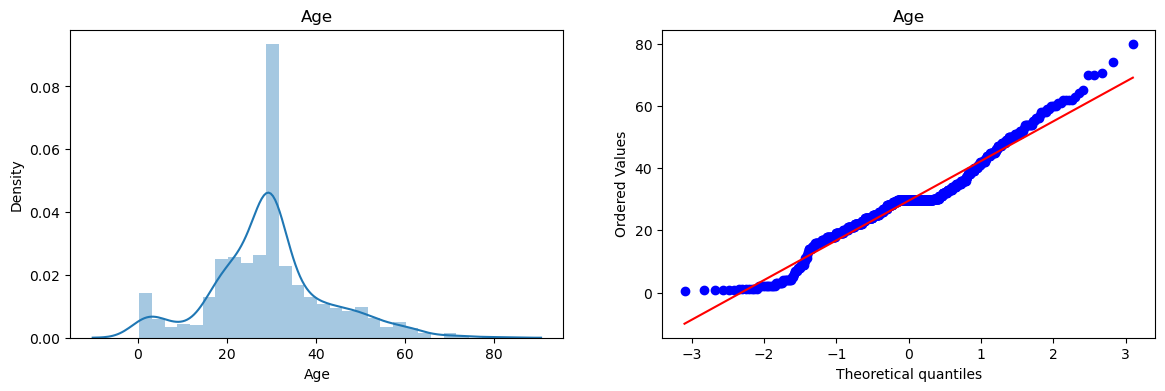

C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


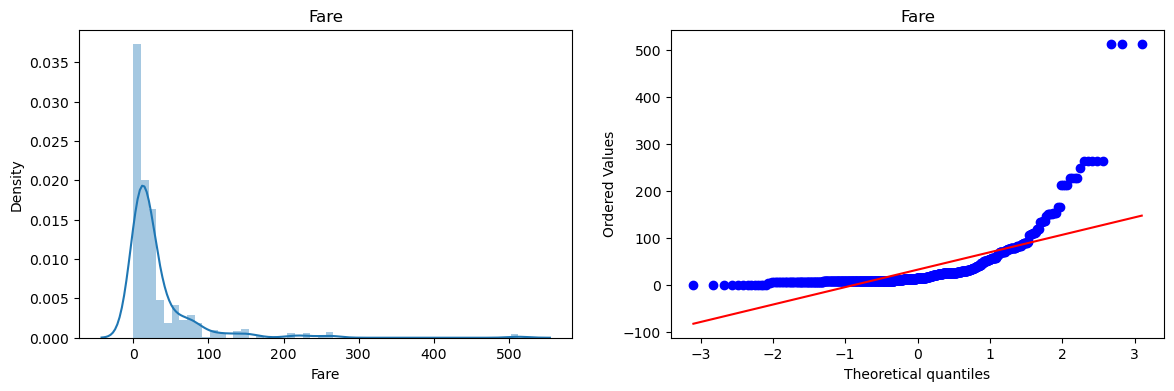

In [54]:
import scipy.stats as stats
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title(col)

    plt.show()

# Function Transformer using Column Transformer

In [55]:
from sklearn.preprocessing import PowerTransformer,FunctionTransformer

In [93]:
from sklearn.compose import ColumnTransformer
trf=ColumnTransformer(transformers=[
    ('lo',FunctionTransformer(lambda x:x**1/2),[0]),
    ('log',FunctionTransformer(np.log1p),[1])
    
],remainder='passthrough')
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

# Converting Transformed X_train,X_test in DataFrame

In [94]:
X_train_transformed=pd.DataFrame(X_train_transformed,columns=X_train.columns)
X_test_transformed=pd.DataFrame(X_test_transformed,columns=X_test.columns)

# Checking Function Transformer using QQ plot

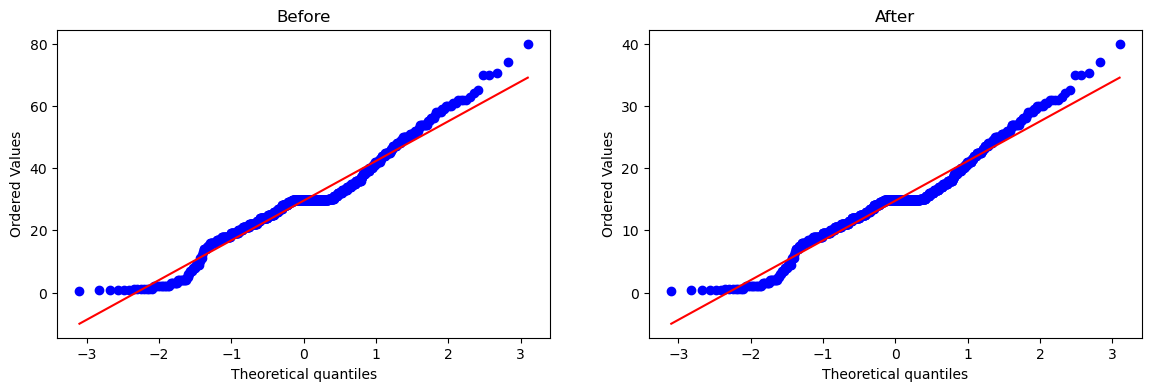

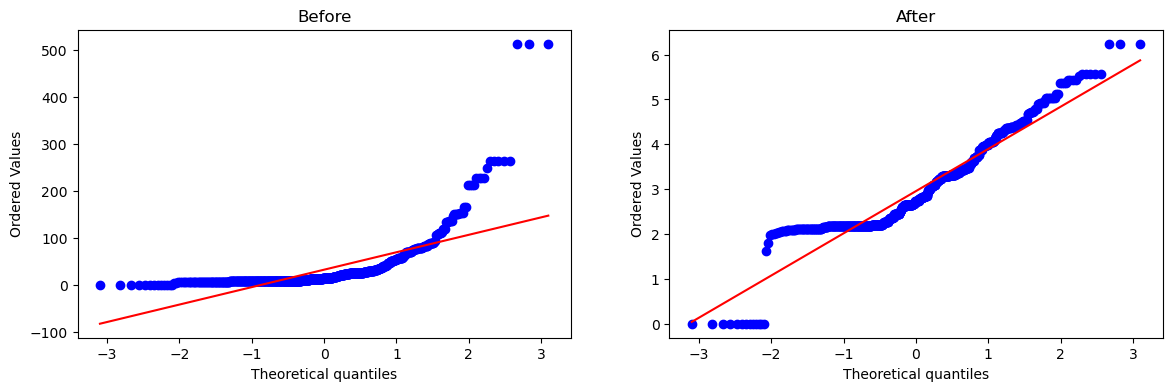

In [95]:
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title("Before")

    plt.subplot(122)
    stats.probplot(X_train_transformed[col],dist='norm',plot=plt)
    plt.title('After')

    plt.show()

C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


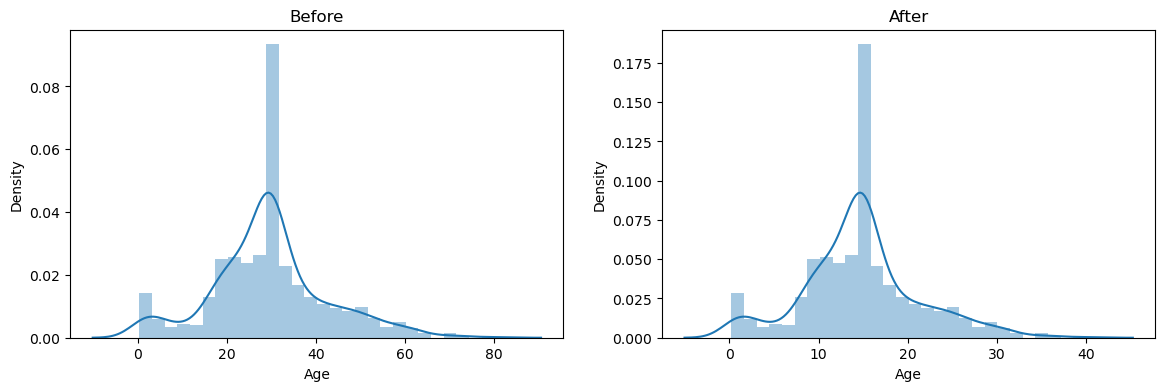

C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


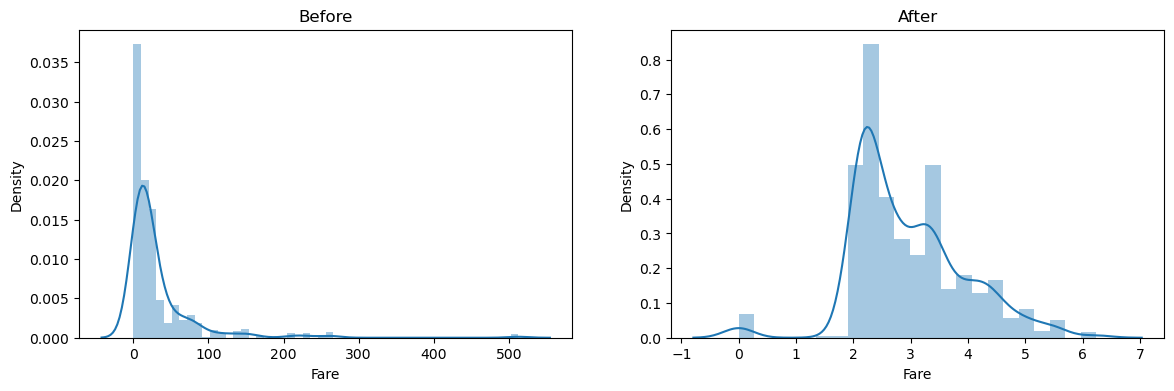

In [96]:
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title("Before")

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title('After')

    plt.show()